In [26]:
#libraries and packages needed:
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## timings analysis:

In [27]:
#report vs presentantion:
mpl.rc('font', family = 'serif')
mpl.rc('text', usetex = True)
mpl.rc('text.latex', preamble = r'\usepackage{amsmath}')
mpl.rcParams['figure.figsize'] = [10, 10]

what = 'report' #'presentation'

if what == 'presentation' :
    
    mpl.rcParams['font.size'] = 24
    mpl.rc('xtick', labelsize = 18) 
    mpl.rc('ytick', labelsize = 18)
    cbar_length = 0.6
    
    file = 'timings_presentation.csv'
    
    # levels of theory:
    lots_labels = ['B97-1', 'B3LYP', r'$\omega$B97X-D', 'M06-2X', 'B2PLYP']

    # basis sets:
    bss_labels = ['6-31G*', 'pcseg-1', 'aug-pcseg-1', 'def2-SVPD', 'cc-pVDZ', 'pcseg-2', 'aug-pcseg-2', 'def2-TZVPD', 'cc-pVTZ']
    
elif what == 'report' :
    
    mpl.rcParams['font.size'] = 16
    mpl.rc('xtick', labelsize = 14) 
    mpl.rc('ytick', labelsize = 14)
    cbar_length = 0.4
    
    file = 'timings_report.csv'
    
    # levels of theory:
    lots_labels = ['B3LYP', 'B97-1', 'PBE0', 'TPSSh', 'M06-2X', r'$\omega$B97X-D', 'B2PLYP', 'B2PLYP-D']

    # basis sets:
    bss_labels = ['6-31G*', '6-31G**', 'pc-1', 'pcseg-1', 'def2-SVP', 'cc-pVDZ', 'aug-pcseg-1', 'def2-SVPD', 'aug-cc-pVDZ', 'pc-2', 'pcseg-2', 'def2-TZVPD', 'cc-pVTZ', 'aug-pcseg-2']

In [28]:
#general variables:
general_directory = '\\Users\\natia\\OneDrive\\Pulpit\\benchmark paper'

#reading in all timings data:
timings = pd.read_csv(f'{general_directory}\\{file}')
timings = timings['Timing in kSU'].values

timings_log = np.where(timings != -1, np.log(timings), timings) #make all values log scale and round to full integers

C:\Users\natia\AppData\Local\Temp\ipykernel_18588\947064404.py:8: RuntimeWarning: invalid value encountered in log
  timings_log = np.where(timings != -1, np.log(timings), timings) #make all values log scale and round to full integers


In [29]:
#masking dh not done with specific bs:
timings_mask = np.array([], dtype = bool)

for t in timings_log : 
    
    if t == -1 :
        
        timings_mask = np.append(timings_mask, True)
    
    else :
        
        timings_mask = np.append(timings_mask, False)

# timings heatmap:

In [30]:
timings_log = timings_log.reshape(len(bss_labels), len(lots_labels)).T #reshape data into heatmap shape (.T to get x = bss and y = lot)
timings_mask = timings_mask.reshape(len(bss_labels), len(lots_labels)).T #reshape making data into heatmap shape (.T to get x = bss and y = lot)

#function to plot timings as heatmap:
def plot_heatmap(colour_scheme, c) :
    
    fig, ax = plt.subplots()
    palette = sns.color_palette(colour_scheme, as_cmap = True)

    timings_heatmap = sns.heatmap(timings_log, mask = timings_mask,
                                  vmin = np.min(timings_log), vmax = np.max(timings_log), center = c,
                                  linewidths = 0.5, linecolor = 'white',
                                  cbar = True, cbar_kws = {'label' : r'\textbf{Calculation time}', 'shrink' : cbar_length, 'extend': 'max'},
                                  square = True, ax = ax,
                                  xticklabels = bss_labels,
                                  yticklabels = lots_labels,
                                  cmap = palette)

    plt.ylabel(r'\textbf{Method}')
    plt.xlabel(r'\textbf{Basis Set}')

    cbar = timings_heatmap.collections[0].colorbar
    cbar.set_ticks([]) #hide x ticks
    cbar.set_ticklabels([]) #hide y ticks

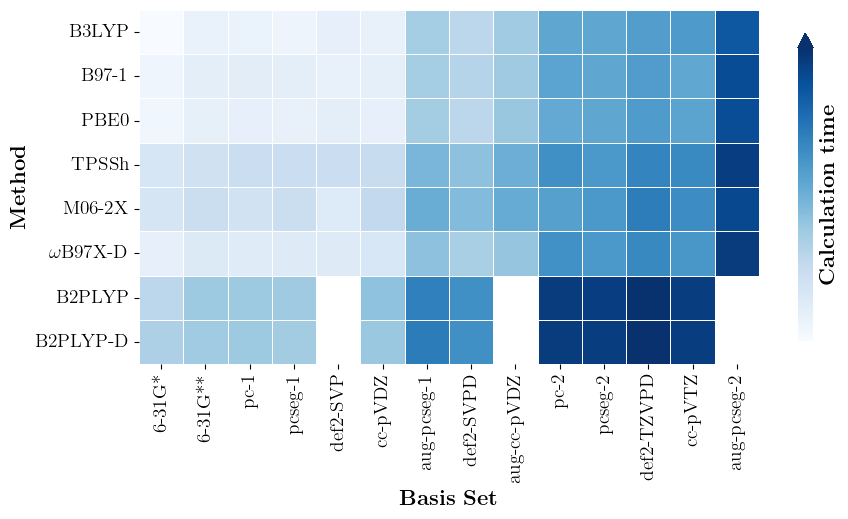

In [31]:
plot_heatmap('Blues', 0)

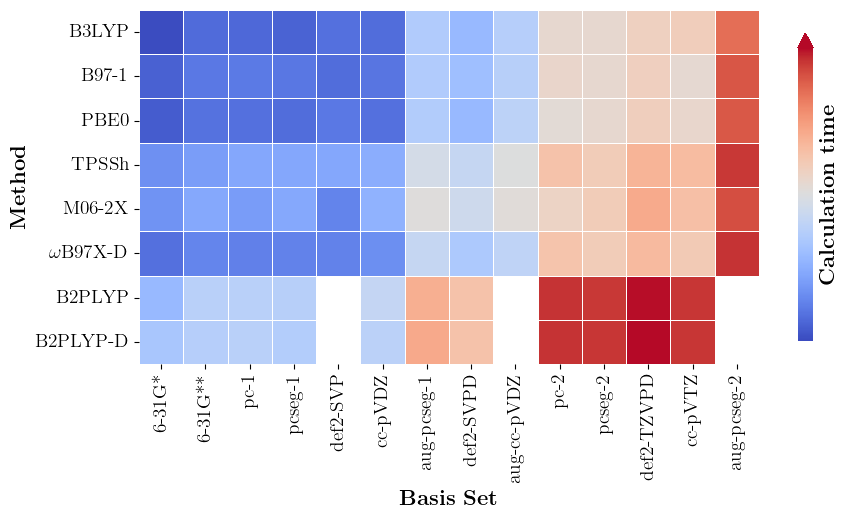

In [32]:
plot_heatmap('coolwarm', 0)

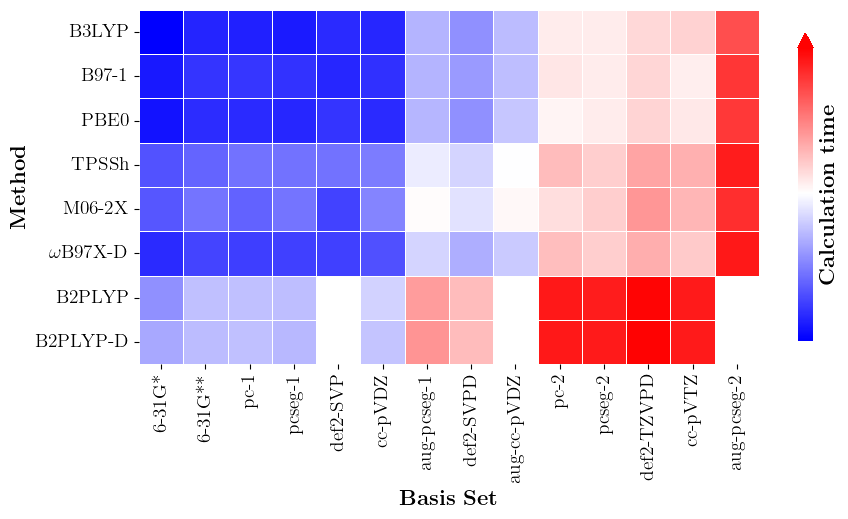

In [33]:
plot_heatmap('bwr', 0)

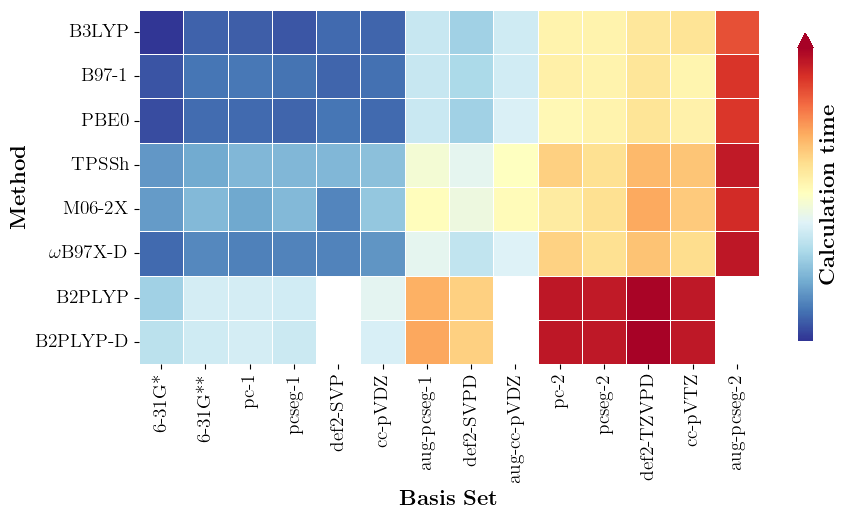

In [34]:
plot_heatmap('RdYlBu_r', 0)

# timings bubble plot:

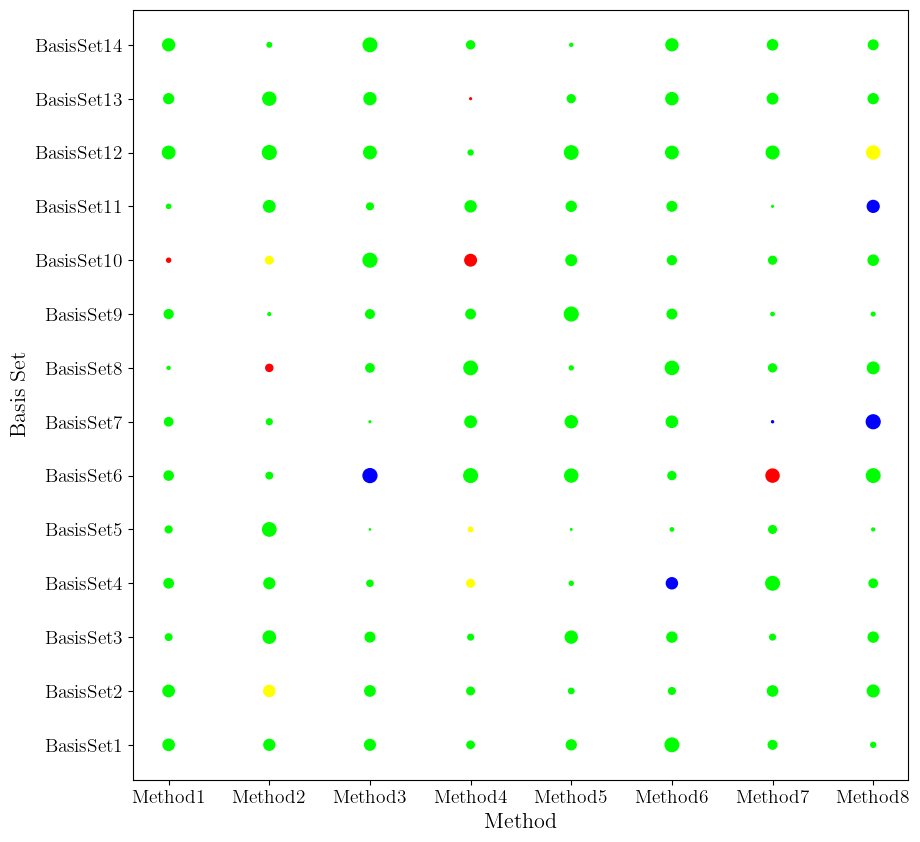

In [35]:
#sample data (to be replaced with actual data):
timings = np.random.rand(14, 8)
lots_labels = ['Method1', 'Method2', 'Method3', 'Method4', 'Method5', 'Method6', 'Method7', 'Method8']
bss_labels = ['BasisSet1', 'BasisSet2', 'BasisSet3', 'BasisSet4', 'BasisSet5', 'BasisSet6', 'BasisSet7', 'BasisSet8', 'BasisSet9', 'BasisSet10', 'BasisSet11', 'BasisSet12', 'BasisSet13', 'BasisSet14']

fig, ax = plt.subplots(figsize = (10, 10))
x_coords, y_coords = np.meshgrid(np.arange(len(lots_labels)), np.arange(len(bss_labels))) #create meshgrid for x and y coordinates

timings_flat = timings.flatten() #flatten timings array (make it 1D)
bubble_sizes = timings_flat * 100

num_bubbles = len(timings_flat) #generate colours for each bubble
colors = np.zeros((num_bubbles, 3)) #initialize an array to store bubble colors

#assign random colors to a few points:
red_indices = np.random.choice(num_bubbles, size = 5, replace = False)
blue_indices = np.random.choice([idx for idx in range(num_bubbles) if idx not in red_indices], size = 5, replace = False)
yellow_indices = np.random.choice([idx for idx in range(num_bubbles) if idx not in red_indices and idx not in blue_indices], size = 5, replace = False)
green_indices = [idx for idx in range(num_bubbles) if idx not in red_indices and idx not in blue_indices and idx not in yellow_indices]

colors[red_indices] = [1, 0, 0]  #red
colors[blue_indices] = [0, 0, 1]  #blue
colors[yellow_indices] = [1, 1, 0]  #yellow
colors[green_indices] = [0, 1, 0]  #green

bubble_plot = ax.scatter(x_coords.flatten(), y_coords.flatten(), s = bubble_sizes, c = colors)

ax.set_xlabel('Method', fontsize = 16)
ax.set_ylabel('Basis Set', fontsize = 16)
ax.set_xticks(np.arange(len(lots_labels)))
ax.set_yticks(np.arange(len(bss_labels)))
ax.set_xticklabels(lots_labels, fontsize = 14)
ax.set_yticklabels(bss_labels, fontsize = 14)

plt.show()
